1. House Price Prediction System

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset
df = pd.read_csv("D:/Japanese/house_data.csv")

In [8]:
# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
  df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
  raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")

X = df.drop(columns=['price']) 
y = df['price'] 

# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
  raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")


Non-numeric columns: ['municipality_name', 'object_type_name']


In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Model Evaluation:\nMSE: {mse:.2f}, R-squared: {r2:.2f}')

Model Evaluation:
MSE: 149210817252.16, R-squared: 0.49


2. Salary Prediction System

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load dataset 
df1 = pd.read_csv("D:/Japanese/salary_data.csv")
print(df1.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [18]:
# Preprocess data
df1.dropna(inplace=True)
# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in
df1.columns]
# Apply one-hot encoding only if columns exist
if existing_categorical_columns:
  df1 = pd.get_dummies(df1, columns=existing_categorical_columns,drop_first=True)


In [ ]:

# Define features and target variable
if 'Salary' in df1.columns:
  X = df1.drop(columns=['Salary'])
  y = df1['Salary']

  #Split dataset
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
  random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)
  
  y_pred = model.predict(X_test)
 
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f'MSE: {mse}, R-squared: {r2}')
  
  # Example prediction
  sample_input = X_test.iloc[[0]] 
  predicted_salary = model.predict(sample_input)
  print(f'Predicted Salary for sample input: {predicted_salary[0]}')
else:
  print("Error: The 'Salary' column is missing from the dataset.")

MSE: 49830096.85590839, R-squared: 0.9024461774180497
Predicted Salary for sample input: 115790.21011287419


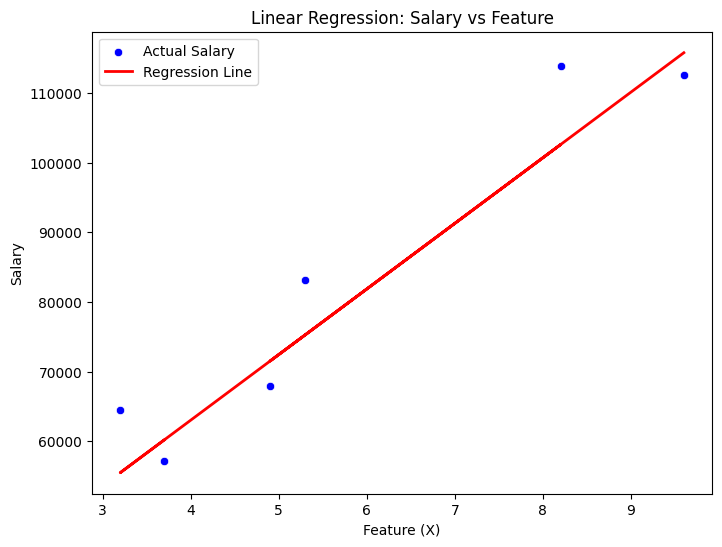

['D:/Japanese/salary_model.pkl']

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.values.flatten(), y=y_test, color="blue", label="Actual Salary")
plt.plot(X_test.values.flatten(), y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Feature (X)")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Feature")
plt.legend()
plt.show()
# For Sreamlit App
import joblib
joblib.dump(model, "D:/Japanese/salary_model.pkl")

3. Stock Price Trend Prediction

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st


In [34]:
# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df
# Load dataset
ticker = 'AAPL' 

df = get_stock_data(ticker)

# Define features and target variable
X = df[['Day', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R-squared: {r2}')


MSE: 282.0519929828769, R-squared: 0.8168661753310864


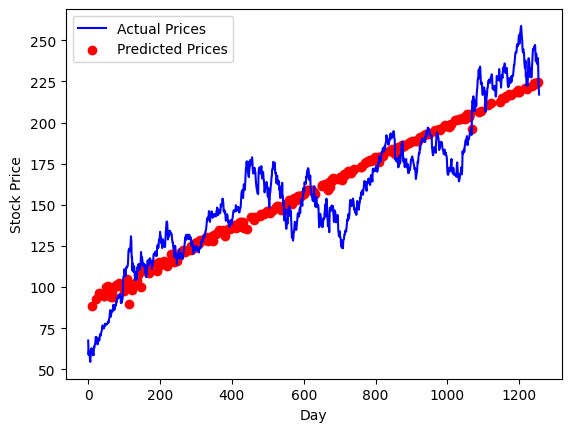

In [35]:

fig, ax = plt.subplots()
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
ax.set_xlabel('Day')
ax.set_ylabel('Stock Price')
ax.legend()
plt.show()

4. Customer Churn Prediction for a Subscription Service

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import streamlit as st

# Load dataset
df3 = pd.read_csv("D:/Japanese/Customer_Churn_dataset.csv")
df3.dropna(inplace=True)


In [56]:
# Convert 'churn' column to integers
df3['churn'] = df3['churn'].astype(str).str.strip().map({'False': 0, 'True':1})

# Convert categorical columns to numerical
df3 = pd.get_dummies(df3, columns=['international_plan', 'voice_mail_plan'],drop_first=True)

# Drop unnecessary columns
df3.drop(columns=['Id', 'state', 'phone_number'], inplace=True)

# Define features and target variable
X = df3.drop(columns=['churn'])
y = df3['churn']


In [57]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')
print(report)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_.flatten()  # or model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Model Coefficients:")
print(coefficients)



Accuracy: 0.88

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8

Model Coefficients:
                  Feature  Coefficient
4     voice_mail_plan_Yes     0.711275
1              complaints     0.528820
2     subscription_length     0.040185
0                   usage    -0.010365
3  international_plan_Yes    -0.005684
